<a href="https://colab.research.google.com/github/coccoalessandro/2024-07-04-A/blob/main/Lab4_DSDBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   LAB 04 - Data Mining

## Introduction to Python

Full Intro: https://dbdmg.polito.it/dbdmg_web/wp-content/uploads/2024/03/1-Python-Programming.pdf



```python
# Object Oriented Programming
obj.method(arg1, arg2, ecc...)

# Data type
int, str, float, None, list, set

# Import libraries
import library_name
from library_name import class

# loops
for el in list_name:
    # do something

# condition
if condition_name:
    # do something
else:
    # do something

# print
print('string', string)
```

---

## Introduction to Python Libraries

### Pandas

Documentation: https://pandas.pydata.org/docs/

In [1]:
import pandas as pd

Ciao


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

▶️ Read data
```python
dataframe=pd.read_<TYPE FILE>(filename) # read_csv(), read_excel(), read_txt()
```

▶️ Operate with features
```python

# select features
feature1=dataframe[feature_name]

# drop features
dataframe=dataframe.drop(columns=[feature_name1, feature_name2])

# see columns
columns=dataframe.columns
```

### Matplotlib

Documentation: https://matplotlib.org/stable/index.html

In [ ]:
from matplotlib.pyplot import plt

▶️ Create Plot

```python
fig, ax=plt.figure(figsize=(x_size, y_size), dpi=dpi_val) #choose best values empirically
```

### Scikit-Learn

Documentation: https://scikit-learn.org/1.5/user_guide.html

In [ ]:
from sklearn.class_type import class_name

▶️ Encoding

```python
encoder=EncoderName()
encoded=encoder.fit_transform(to_transform)
```

▶️ Classifier

```python
classifier=ClassifierName(arg1, arg2, arg3) # the arguments may be optional
classifier.fit(train_data, train_label) # inplace training
prediction=classifier.predict(test_data)
accuracy=accuracy_score(test_label, prediction)
```

# Demo

We will start with an example of Clustering with K-Means to understand how to use these libraries together.

1. Load Iris Dataset (pandas)

In [13]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


2. Train-test split (scikit-learn)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# We can extend this splitting with a cross-validation later if needed (https://scikit-learn.org/stable/modules/cross_validation.html)

Train set size: 105 samples
Test set size: 45 samples


3. Visualize train Data (matplotlib)

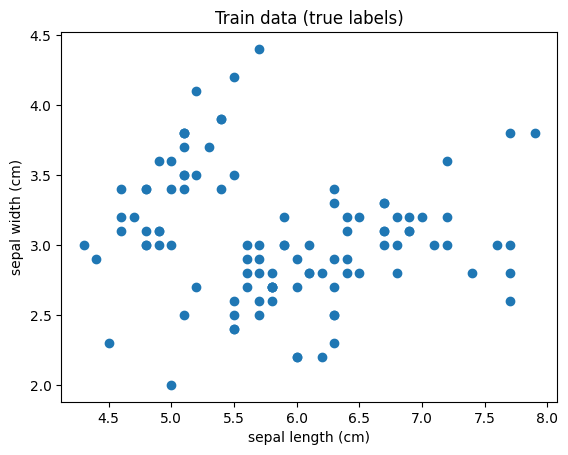

In [ ]:
import matplotlib.pyplot as plt

# Quick scatter of two features (train, true labels)
x1 = X.columns[0]
x2 = X.columns[1]
plt.scatter(X_train[x1], X_train[x2])
plt.xlabel(x1)
plt.ylabel(x2)
plt.title('Train data (true labels)')
plt.show()

4. Standardize Data (scikit-learn)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
print(f"Scaler mean after fit: (mean: {scaler.mean_}, var: {scaler.var_})")

X_test_s = scaler.transform(X_test)

Scaler mean after fit: (mean: [5.87333333 3.0552381  3.7847619  1.20571429], var: [0.7375746  0.20704399 3.15252971 0.59882449])


5. Visualize Standardized Data (matplotlib)

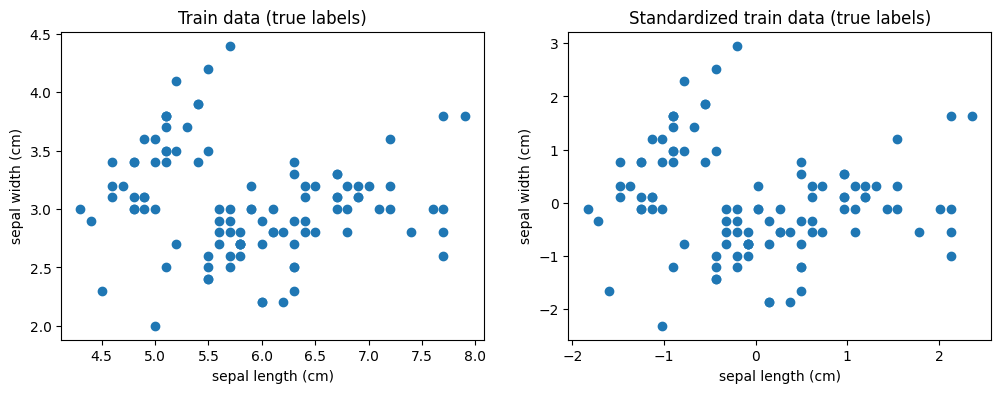

In [ ]:
# let's create side-by-side plots for better comparison
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(X_train[x1], X_train[x2])
ax[0].set_xlabel(x1)
ax[0].set_ylabel(x2)
ax[0].set_title('Train data (true labels)')

ax[1].scatter(X_train_s[:,0], X_train_s[:,1])
ax[1].set_xlabel(x1)
ax[1].set_ylabel(x2)
ax[1].set_title('Standardized train data (true labels)')
plt.show()

6. Apply K-Means (scikit-learn)

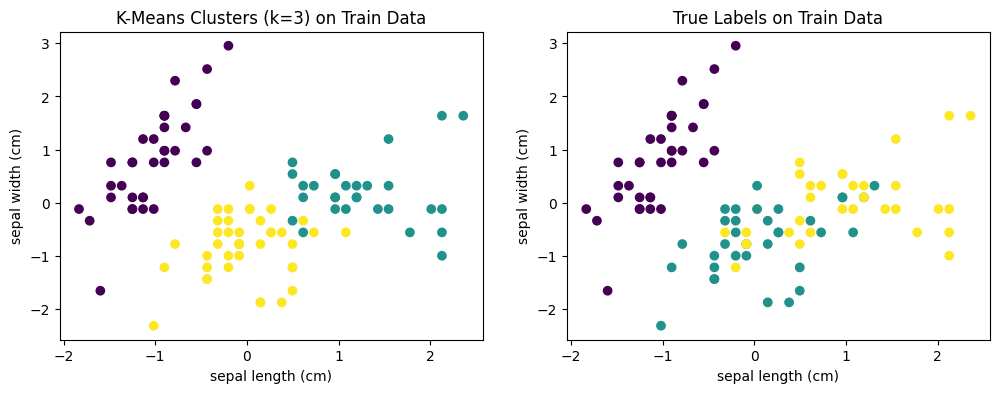

In [ ]:
# K-Means
# Let's try with 2, 3, and 4 clusters and see which one works best
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_s)
train_clusters = kmeans.labels_

# Visualize clusters
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(X_train_s[:,0], X_train_s[:,1], c=train_clusters, cmap='viridis')
ax[0].set_xlabel(x1)
ax[0].set_ylabel(x2)
ax[0].set_title(f'K-Means Clusters (k={k}) on Train Data')

ax[1].scatter(X_train_s[:,0], X_train_s[:,1], c=y_train, cmap='viridis')
ax[1].set_xlabel(x1)
ax[1].set_ylabel(x2)
ax[1].set_title('True Labels on Train Data')
plt.show()

7. Inference and visualize test data (matplotlib)


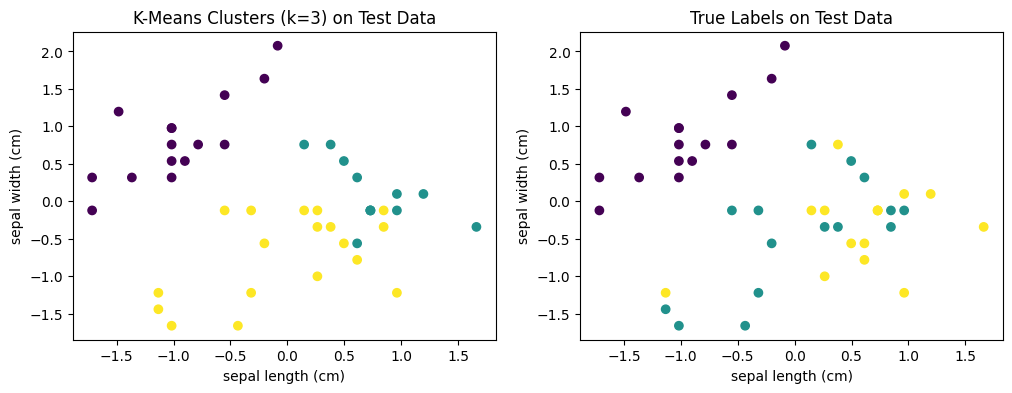

In [ ]:
test_clusters = kmeans.predict(X_test_s)

# Visualize test data clusters
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(X_test_s[:,0], X_test_s[:,1], c=test_clusters, cmap='viridis')
ax[0].set_xlabel(x1)
ax[0].set_ylabel(x2)
ax[0].set_title(f'K-Means Clusters (k={k}) on Test Data')
ax[1].scatter(X_test_s[:,0], X_test_s[:,1], c=y_test, cmap='viridis')
ax[1].set_xlabel(x1)
ax[1].set_ylabel(x2)
ax[1].set_title('True Labels on Test Data')
plt.show()

#   Exercise 1

In [26]:
# LOAD ALL LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Read file excel "User.xlsx"

Load the Users.xls file into the Disk on the left in the File Section (Folder Icon). Next, read the file using pandas by passing the path.

In [6]:
data_path = '../Users.xls'
data = pd.read_excel(data_path)

In a Jupyter Notebook cell, you can print a subset of the representation by simply calling the name of the variable containing the DataFrame.

In [7]:
# print dataset
data

,Age,Workclass,FlnWgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital loss,Hours-per-week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Basic
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Basic
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Basic
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Basic
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,Basic
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,Premium
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,Basic
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,Basic


Remove duplicated elements (it is an method of DataFrame).

In [17]:
cleaned_data = data.drop_duplicates()
cleaned_data

,Age,Workclass,FlnWgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital loss,Hours-per-week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Basic
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Basic
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Basic
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Basic
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,Basic
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,Premium
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,Basic
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,Basic


## Select Label and apply encoding

Separate the dataset into features, referred to as X, and labels, referred to as y.


In [24]:
X = cleaned_data.drop("Class", axis = 1)
y = cleaned_data["Class"]

# assert no column in X is equivalent to y
for col in X.columns:
    assert not X[col].equals(y), f"Column {col} is equivalent to target y, you should remove it from X"

Afterwards, utilize Label Encoder to encode the categorical features.

> *Hint:* To identify categorical columns, you can use pandas functions or simply inspect the data. For label encoding, Scikit-learn's provides a dedicated class.

In [27]:
label_encoder = LabelEncoder()
columns_to_encode = X.select_dtypes(include=['object']).columns
for col in columns_to_encode:
    X[col] = label_encoder.fit_transform(X[col])

##  Use the decision tree classifier model.

> *Hint:* Use DecisionTreeClassifier() and its .fit function

In [28]:
# Initialize the Decision Tree Classifier, set criterion and max depth
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# Train the Decision Tree Classifier
decision_tree.fit(X, y)

DecisionTreeClassifier()

Goal: Control the model complexity (depth) and see the overall accuracy on the training set.

##  Print the structure of the decision tree

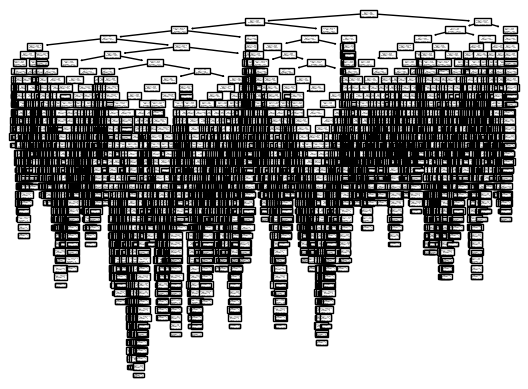

In [29]:
# Define figure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()

# use plot_tree from sklearn
plot_tree(decision_tree)
plt.show()

In [35]:
# Decision tree depth (it is an attribute)
print(decision_tree.get_depth())

44


## Exercise 2

Impact of the hyper-parameters: Evaluate the Tree by combining different `max depth` and `min_impurity` values

> *Hint:* use two nested loops and store the performance with the method `.score()` of the decision tree object.

In [ ]:
max_depths = ...
min_impurities = ...

...

# Exercise 3

We now want to evaluate the performance of our Decision Tree model using another target feature: **Native country**. Repeat Exercise 1-2 using this feature as target. Compare the results with the previous target feature.

# Exercise 4-5

## Validation of a classification model using Cross Validation

Cross-validation is a technique used to assess the performance and generalization ability of machine learning models, particularly in the context of classification tasks. It involves partitioning the dataset into multiple subsets, known as folds.

1. **Partitioning the Dataset**: The dataset is divided into k equal-sized folds.

2. **Training and Testing**: The model is trained k times, each time using k-1 folds for training and the remaining fold for testing.

3. **Evaluation**: The performance of the model is evaluated on each fold, and the results are averaged to obtain a robust estimate of the model's performance.

4. **Advantages**: Cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. It helps to detect overfitting and assesses the model's ability to generalize to unseen data.

> *Hint:* Use `cross_val_score` and `cross_val_predict` to perform cross-validation easily. Follow the same instruction of Exercise 1 to initialise and use the model

In [ ]:
# We now want again to predict `class` feature

assert 'class' not in X.columns and y.name == 'class', "Feature 'class' should be the target variable y"

### Decision Tree with Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the decision tree classifier

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

### K-NN with Cross Validation

**Warning**: K-NN requires data standardization before training and testing.

In [ ]:
# Initialize the decision K-NN classifier
from sklearn.neighbors import KNeighborsClassifier

# Perform StandardScaler

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

### Naive Bayes Classifier with Cross Validation

In [ ]:
# Initialize the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

# Exercise 6

In [ ]:
# Perform Correlation Analysis using only numerical features
